# Linear Recression on stock data 
## Multiple Features
### (Open, RSI, SMA, EMA, MACD, MACD_signal, MACD_hist)

In [24]:
import pandas as pd
import numpy as np
import yfinance as yf
import talib

# Download stock data
data = yf.download('BEL.NS', start='2023-01-01', end='2024-06-07')

# Calculate technical indicators
data['SMA'] = talib.SMA(data['Close'], timeperiod=50)
data['EMA'] = talib.EMA(data['Close'], timeperiod=50)
data['RSI'] = talib.RSI(data['Close'], timeperiod=14)
data['MACD'], data['MACD_signal'], data['MACD_hist'] = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Display the data with indicators
data.tail()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,
2024-05-31,294.200012,297.200012,286.299988,295.950012,295.950012,51397345,234.685001,241.636641,78.517050,18.495086,15.020465,3.474621
2024-06-03,323.000000,323.000000,309.299988,318.649994,318.649994,67256146,237.281000,244.656772,84.094390,20.326941,16.081760,4.245181
2024-06-04,312.000000,312.000000,230.050003,255.550003,255.550003,268052657,238.594001,245.083958,47.319002,16.496891,16.164787,0.332105
2024-06-05,264.500000,264.500000,230.000000,260.350006,260.350006,193487058,240.093001,245.682626,49.141029,13.691048,15.670039,-1.978991
2024-06-06,267.000000,281.500000,267.000000,273.649994,273.649994,95473047,241.817001,246.779386,53.898838,12.397681,15.015567,-2.617886


In [25]:
features = data[['Open','SMA','EMA','RSI','MACD','MACD_signal', 'MACD_hist']][49:]

In [26]:
features

,Open,SMA,EMA,RSI,MACD,MACD_signal,MACD_hist
Date,,,,,,,
2023-03-14,92.849998,96.915000,96.915000,39.485603,-0.848696,-0.702257,-0.146439
2023-03-15,93.500000,96.762000,96.745784,39.041143,-0.962522,-0.754310,-0.208212
2023-03-16,92.699997,96.593000,96.555753,36.950869,-1.096573,-0.822763,-0.273810
2023-03-17,93.099998,96.486000,96.431998,43.884253,-1.069444,-0.872099,-0.197345
2023-03-20,93.000000,96.340000,96.283685,41.430979,-1.095831,-0.916845,-0.178986
...,...,...,...,...,...,...,...
2024-05-31,294.200012,234.685001,241.636641,78.517050,18.495086,15.020465,3.474621
2024-06-03,323.000000,237.281000,244.656772,84.094390,20.326941,16.081760,4.245181
2024-06-04,312.000000,238.594001,245.083958,47.319002,16.496891,16.164787,0.332105


In [27]:
y = data['Close'][49:]
y

Date
2023-03-14     92.750000
2023-03-15     92.599998
2023-03-16     91.900002
2023-03-17     93.400002
2023-03-20     92.650002
                 ...    
2024-05-31    295.950012
2024-06-03    318.649994
2024-06-04    255.550003
2024-06-05    260.350006
2024-06-06    273.649994
Name: Close, Length: 301, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(features,y, train_size=0.7, random_state=0, shuffle=False)

model = LinearRegression()
model


LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
pred = model.predict(X_test)
pred

array([189.88678245, 189.07276753, 188.2249333 , 189.55906378,
       190.21156941, 189.36917475, 187.54219292, 185.97141304,
       185.54749986, 184.2893953 , 183.63541683, 183.16268739,
       184.02346123, 182.92065093, 179.28401637, 177.98762126,
       180.32006789, 183.53699878, 186.44803706, 187.7492891 ,
       189.12597582, 189.52678869, 191.97828071, 197.73996391,
       201.38375081, 202.92971435, 205.02334623, 205.7716293 ,
       206.93029715, 209.38213464, 211.46685168, 212.46761704,
       214.58773425, 215.22621705, 210.52765887, 203.36730252,
       200.01425133, 198.49543694, 195.90854926, 193.36845023,
       192.1146747 , 195.26077235, 197.30863718, 198.55349283,
       199.84667873, 201.22826761, 205.93990379, 212.21880255,
       216.59196817, 218.59956457, 220.65413497, 223.07098971,
       225.45124197, 228.0536455 , 231.10116187, 232.70262594,
       234.12755978, 234.62417246, 234.31323106, 236.52050899,
       237.0098175 , 238.41847319, 239.68460158, 241.22

In [31]:
Output = X_test.copy()
Output['Predicted Close price'] = pred 
Output['Actual Close price'] = y_test
Output

,Open,SMA,EMA,RSI,MACD,MACD_signal,MACD_hist,Predicted Close price,Actual Close price
Date,,,,,,,,,
2024-01-19,190.000000,164.952000,169.003271,71.340244,6.529794,7.221238,-0.691444,189.886782,191.850006
2024-01-23,195.250000,165.886001,169.712946,61.698164,6.141968,7.005384,-0.863416,189.072768,187.100006
2024-01-24,186.800003,166.912001,170.479105,64.065583,5.939631,6.792234,-0.852603,188.224933,189.250000
2024-01-25,190.750000,167.930001,171.232866,64.559341,5.749314,6.583650,-0.834336,189.559064,189.699997
2024-01-29,190.000000,168.880001,172.004126,65.904745,5.630413,6.393002,-0.762590,190.211569,190.899994
...,...,...,...,...,...,...,...,...,...
2024-05-31,294.200012,234.685001,241.636641,78.517050,18.495086,15.020465,3.474621,291.972401,295.950012
2024-06-03,323.000000,237.281000,244.656772,84.094390,20.326941,16.081760,4.245181,304.221350,318.649994
2024-06-04,312.000000,238.594001,245.083958,47.319002,16.496891,16.164787,0.332105,289.011115,255.550003


In [33]:
y_test

Date
2024-01-19    191.850006
2024-01-23    187.100006
2024-01-24    189.250000
2024-01-25    189.699997
2024-01-29    190.899994
                 ...    
2024-05-31    295.950012
2024-06-03    318.649994
2024-06-04    255.550003
2024-06-05    260.350006
2024-06-06    273.649994
Name: Close, Length: 91, dtype: float64

In [35]:
import matplotlib.pyplot as plt


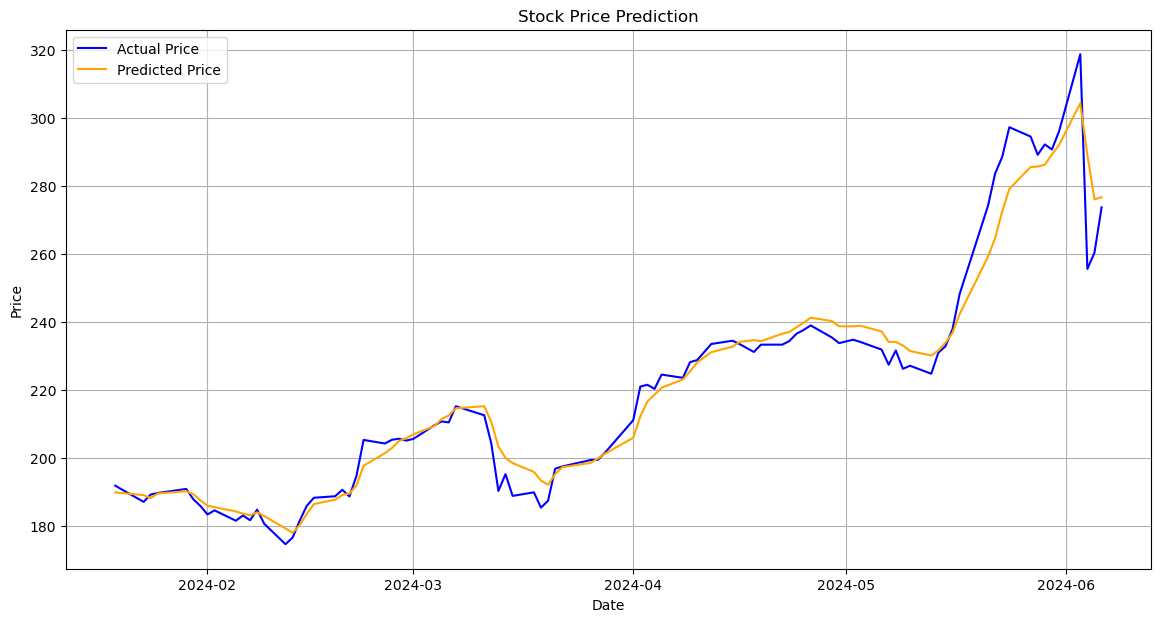

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, pred, label='Predicted Price', color='orange')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()